In [3]:
import pandas as pd

json_df = pd.read_json('dim_customer.json')

json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [9]:
import pandas as pd

csv_df = pd.read_csv('fct_invoice.csv')

csv_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### EASY

### 1. How many unique customers are in the dataset?

In [11]:
print(json_df['id'].nunique())

5191


### 2. What are the different categories of products available? How many unique categories are there?

In [12]:
print(csv_df['category'].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [13]:
print(csv_df['category'].nunique())

8


### 3. Which payment method is the most popular? How many times was it used?

In [14]:
payment_counts = csv_df['payment_method'].value_counts()
most_popular =  payment_counts.max()
most_popularpay = payment_counts.idxmax()
print(most_popularpay,":", most_popular)

Cash : 44447


### MEDIUM

### 1. What are the three most popular categories, by total sales?

In [16]:


csv_df['Sales'] = csv_df['price'] * csv_df['quantity']

(csv_df.groupby('category')['Sales'].sum()).sort_values(ascending = False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Sales, dtype: float64

### 2. What are the total sales attributed to customers over the age of 45?

In [87]:
json_df.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [88]:
csv_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [89]:
new_df = csv_df[['customer_id', 'quantity', 'price']].copy()
new_df['id'] = new_df['customer_id']

new_df = new_df.merge(json_df, how="left")
new_df.head()

,customer_id,quantity,price,id,age,first_name,gender,last_name
0,229,5,1500.40,229,NaN,William,M,Anderson
1,3433,3,1800.51,3433,34.0,Danielle,F,Rivera
2,644,1,300.08,644,46.0,Christopher,M,Stephens
3,4900,5,3000.85,4900,46.0,Laura,F,Kelly
4,1089,4,60.60,1089,NaN,Richard,M,Rhodes


In [90]:
new_df['Sales'] = new_df['price'] * new_df['quantity']
print(new_df)


       customer_id  quantity    price    id   age   first_name gender  \
0              229         5  1500.40   229   NaN      William      M   
1             3433         3  1800.51  3433  34.0     Danielle      F   
2              644         1   300.08   644  46.0  Christopher      M   
3             4900         5  3000.85  4900  46.0        Laura      F   
4             1089         4    60.60  1089   NaN      Richard      M   
...            ...       ...      ...   ...   ...          ...    ...   
99452         2344         5    58.65  2344  53.0     Michelle      F   
99453          172         2    10.46   172   NaN       Lauren      F   
99454          425         2    10.46   425  36.0         Mark      M   
99455          577         4  4200.00   577  64.0        David      M   
99456           30         3    35.19    30   NaN      Roberto      M   

      last_name     Sales  
0      Anderson   7502.00  
1        Rivera   5401.53  
2      Stephens    300.08  
3         K

In [93]:
new_df = new_df[new_df['age'] > 45]

print(new_df)

       customer_id  quantity    price    id   age   first_name gender  \
2              644         1   300.08   644  46.0  Christopher      M   
3             4900         5  3000.85  4900  46.0        Laura      F   
5              349         5  1500.40   349  64.0        Cindy      F   
9             1575         2   600.16  1575  67.0      Michael      M   
11             195         1    15.15   195  48.0      Anthony      M   
...            ...       ...      ...   ...   ...          ...    ...   
99440          639         1   300.08   639  80.0       Steven      M   
99447          538         3   107.52   538  63.0    Elizabeth      F   
99448         1749         4  2400.68  1749  54.0        James      M   
99452         2344         5    58.65  2344  53.0     Michelle      F   
99455          577         4  4200.00   577  64.0        David      M   

      last_name     Sales  
2      Stephens    300.08  
3         Kelly  15004.25  
5         Meyer   7502.00  
9       Pat

In [94]:
total_sum = new_df.sort_values('age', ascending=False)['Sales'].sum()
print(total_sum) #another way to sum all the sales


82039768.14999999


In [95]:
new_df['Sales'].sum()

82039768.15

### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [32]:
import pandas as pd #used this as scratch

df = pd.read_csv('fct_invoice.csv')

df = df['invoice_date']

df
#df['invoice_date'] = pd.to_datetime(df['invoice_date'])

#df['year'] = df['invoice_date'].dt.year

#print(df['year'])


0          5/8/2022
1        12/12/2021
2         9/11/2021
3        16/05/2021
4        24/10/2021
            ...    
99452    21/09/2022
99453    22/09/2021
99454    28/03/2021
99455    16/03/2021
99456    15/10/2022
Name: invoice_date, Length: 99457, dtype: object

In [33]:
#print(df['year'].unique())
import pandas as pd #used this code to check the year range and also the data if it makes sense, I just keep on changing the year numbers 

df = pd.read_csv('fct_invoice.csv')

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['year'] = df['invoice_date'].dt.year
df['2023'] = 2023

new_df = df[df['year'] == 2023]
print(new_df)


C:\Users\Ronald\AppData\Local\Temp\ipykernel_17216\4156493495.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


      invoice_no  customer_id         category  quantity   price  \
19       I992454          562             Toys         4  143.36   
20       I183746         3047         Clothing         1  300.08   
35       I339732         3230  Food & Beverage         1    5.23   
46       I267193          187        Cosmetics         3  121.98   
51       I202367         1018            Books         3   45.45   
...          ...          ...              ...       ...     ...   
99429    I208840          358             Toys         1   35.84   
99441    I203187          154  Food & Beverage         4   20.92   
99446    I327966         1040  Food & Beverage         1    5.23   
99449    I134399           44         Clothing         1  300.08   
99450    I170504         2444            Books         1   15.15   

      payment_method invoice_date      shopping_mall  year  2023  
19              Cash   2023-07-03        Cevahir AVM  2023  2023  
20       Credit Card   2023-02-15  Emaar Square M

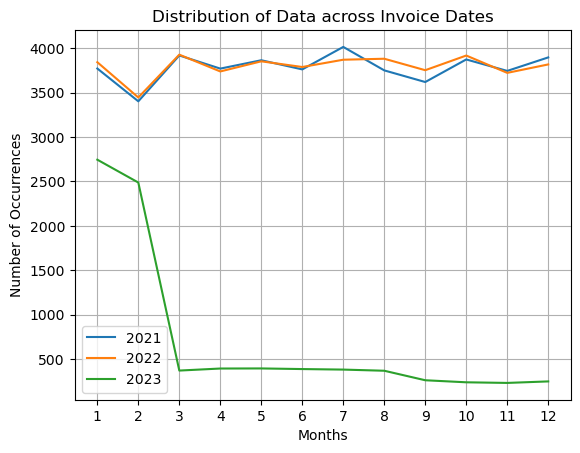

In [34]:
import pandas as pd # used chatgpt for the majority of this code
import matplotlib.pyplot as plt


df['invoice_date'] = pd.to_datetime(df['invoice_date'])


df['year'] = df['invoice_date'].dt.year #used chatgpt to know how to get the year from an invoice date
df['month'] = df['invoice_date'].dt.month# same thing  but for the months


monthly_counts = df.groupby(['year', 'month']).size().unstack().fillna(0) #used chatgpt here


fig, ax = plt.subplots() #saw this in a google site regarding the c values being months


for year in [2021, 2022, 2023]:
    ax.plot(range(1, 13), monthly_counts.loc[year], label=str(year)) #saw this in a google site on how to label months in the x axis

plt.xlabel('Months')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Data across Invoice Dates')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
for 2021 and 2022, it had a similar graph with peaks in the ber months, but for 2023, it went down significantly, showing only a consistent/stable trend for 2021-2022, while a significant downward trend for 2023

### HARD


### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [129]:
new_df = csv_df[['customer_id', 'quantity', 'price','category']].copy()
new_df['id'] = new_df['customer_id']

new_df = new_df.merge(json_df, how="left")
new_df.head()

,customer_id,quantity,price,category,id,age,first_name,gender,last_name
0,229,5,1500.40,Clothing,229,NaN,William,M,Anderson
1,3433,3,1800.51,Shoes,3433,34.0,Danielle,F,Rivera
2,644,1,300.08,Clothing,644,46.0,Christopher,M,Stephens
3,4900,5,3000.85,Shoes,4900,46.0,Laura,F,Kelly
4,1089,4,60.60,Books,1089,NaN,Richard,M,Rhodes


In [135]:

new_df['age_group'] = pd.cut(new_df['age'], bins=age_ranges, labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
print(new_df) #used chat gpt for the bins = age_ranges


       customer_id  quantity    price         category    id   age  \
0              229         5  1500.40         Clothing   229   NaN   
1             3433         3  1800.51            Shoes  3433  34.0   
2              644         1   300.08         Clothing   644  46.0   
3             4900         5  3000.85            Shoes  4900  46.0   
4             1089         4    60.60            Books  1089   NaN   
...            ...       ...      ...              ...   ...   ...   
99452         2344         5    58.65         Souvenir  2344  53.0   
99453          172         2    10.46  Food & Beverage   172   NaN   
99454          425         2    10.46  Food & Beverage   425  36.0   
99455          577         4  4200.00       Technology   577  64.0   
99456           30         3    35.19         Souvenir    30   NaN   

        first_name gender last_name age_group     Sales  
0          William      M  Anderson       NaN   7502.00  
1         Danielle      F    Rivera     30-

In [131]:
new_df['Sales'] = new_df['price'] * new_df['quantity']
print(new_df)

       customer_id  quantity    price         category    id   age  \
0              229         5  1500.40         Clothing   229   NaN   
1             3433         3  1800.51            Shoes  3433  34.0   
2              644         1   300.08         Clothing   644  46.0   
3             4900         5  3000.85            Shoes  4900  46.0   
4             1089         4    60.60            Books  1089   NaN   
...            ...       ...      ...              ...   ...   ...   
99452         2344         5    58.65         Souvenir  2344  53.0   
99453          172         2    10.46  Food & Beverage   172   NaN   
99454          425         2    10.46  Food & Beverage   425  36.0   
99455          577         4  4200.00       Technology   577  64.0   
99456           30         3    35.19         Souvenir    30   NaN   

        first_name gender last_name age_group     Sales  
0          William      M  Anderson       NaN   7502.00  
1         Danielle      F    Rivera     30-

In [108]:
new_df[new_df['category'] == "Books"]

,customer_id,quantity,price,category,id,age,first_name,gender,last_name,age_group,Sales
4,1089,4,60.60,Books,1089,NaN,Richard,M,Rhodes,NaN,242.40
11,195,1,15.15,Books,195,48.0,Anthony,M,Cowan,40-49,15.15
16,236,2,30.30,Books,236,NaN,Trevor,M,Guerrero,NaN,60.60
24,592,5,75.75,Books,592,74.0,Austin,M,Phillips,70-79,378.75
45,1184,5,75.75,Books,1184,29.0,Christopher,M,Chavez,20-29,378.75
...,...,...,...,...,...,...,...,...,...,...,...
99356,81,4,60.60,Books,81,18.0,Jeffrey,M,Beasley,10-19,242.40
99421,1384,3,45.45,Books,1384,21.0,Jamie,F,Knapp,20-29,136.35
99422,993,2,30.30,Books,993,40.0,Thomas,M,Miller,30-39,60.60
99432,1150,2,30.30,Books,1150,46.0,Michele,F,Johnson,40-49,60.60


In [118]:
new_df = new_df[(new_df['age_group'] == "10-19") & (new_df['category'] == "Books")] #tried it first with a much simpler data
print(new_df)


       customer_id  quantity  price category    id   age first_name gender  \
873           3204         5  75.75    Books  3204  20.0      Mason      M   
1139          1687         3  45.45    Books  1687  19.0       Sara      F   
3663            71         5  75.75    Books    71  20.0    Candace      F   
3715           268         1  15.15    Books   268  18.0     Olivia      F   
4092           249         5  75.75    Books   249  20.0      Molly      F   
...            ...       ...    ...      ...   ...   ...        ...    ...   
98267         1352         3  45.45    Books  1352  20.0      Kelly      F   
98286          611         2  30.30    Books   611  19.0    Crystal      F   
98542          283         1  15.15    Books   283  18.0      Sarah      F   
99356           81         4  60.60    Books    81  18.0    Jeffrey      M   
99450         2444         1  15.15    Books  2444  19.0      Allen      M   

      last_name age_group   Sales  
873      Mclean     10-19  

In [103]:
print(new_df['age_group'].unique())

[NaN, '30-39', '40-49', '60-69', '50-59', '20-29', '70-79', '80-89', '10-19']
Categories (8, object): ['10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79' < '80-89']


In [114]:
(new_df.groupby('category')['Sales'].sum()).sort_values(ascending = False)

category
Books    19891.95
Name: Sales, dtype: float64

In [132]:
pivot_table = new_df.pivot_table(index='age_group', columns='category', values='Sales', aggfunc='sum')
print(pivot_table) 


category      Books     Clothing  Cosmetics  Food & Beverage       Shoes  \
age_group                                                                  
10-19      19891.95   3029007.52  178009.48         20433.61  1367187.26   
20-29      80128.35  10079987.28  594733.82         74271.23  6152942.84   
30-39      84446.10  11516170.16  722406.22         89187.19  7178633.37   
40-49      82946.25  10933114.72  656740.32         85034.57  6775319.13   
50-59      79537.50  10819684.48  621366.12         77686.42  6268175.48   
60-69      76234.80  10004067.04  599735.00         76127.88  5499357.71   
70-79      56251.95   7871098.40  427824.52         55584.44  4718536.54   
80-89      21103.95   3739897.04  214684.80         25334.12  2125201.97   

category   Souvenir  Technology       Toys  
age_group                                   
10-19      20128.68   1772400.0   98273.28  
20-29      53570.91   5049450.0  380011.52  
30-39      63705.63   6231750.0  426460.16  
40-49      650